# <p style="background-color:violet;  border :black solid;font-family:verdana; font-size:200%; text-align:center; border-radius: 20px 30px;">Twitter Sentiment Analysis</p>

<center>
<img src="https://miro.medium.com/max/1000/1*vp1M37AGMOFwCvLxVm62IA.jpeg" />
</center>

<div style="border-radius:10px;
        border :blue solid;
        padding: 15px;
        background-color:skyblue;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"><strong>Indian General Lok Sabha Elections</strong> were held in 2019 between the timestamp of 11 April to 19 May. Twitter served as a site for real-time public discussions about the #LokSabhaElections2019. It resulted in more than <strong>396 million</strong> Tweets on the platform from 1 January 2019 to 23 May 2019.

Keeping this in mind, twitter being very big part of the campaign we have done the twitter sentiment anlysis so as to get insights for the election result</span>

# <p style="background-color:orange; border :black solid;font-family:verdana; font-size:200%; text-align:center; border-radius: 20px 30px;">Goal of this notebook</p>

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:#E9F6E2;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;">
     🎯 Election Result Prediction based on Sentiment Analysis of

*   Individual tweets of PM candidates 
    * <a href="https://www.kaggle.com/code/yogesh239/sentiment-analysis-on-modi-rahul-gandhi-s-tweets" target="_blank">Sentiment analysis using python </a> 
    * <a href="https://www.kaggle.com/code/yogesh239/sentiment-analysis-with-r-political-tweets/notebook#Emotions-Plot-for-Tweets-mentioning-Rahul-Gandhi" target="_blank">Sentiment analysis using R</a>
*   General public tweets regarding election<br><br>
    <strong>Dataset </strong>: <a href="https://www.kaggle.com/datasets/yogesh239/twitter-data-about-2019-indian-general-election" target="_blank">Twitter Data - Indian General Election 2019</a> <br>     
</span>
    

# <p style="padding:10px;background-color:lightblue;border :black solid;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:600">Table Of Content</p>
​

---
* [Importing the Libraries](#h1)
   * [Setting up the basic code snippets for sentiment models](#h1.1)<br/>
* [Tweets processing & analysis](#h2)<br/>
   * [Tweets related to Narendra Modi](#h2.1)
   * [Tweets related to Rahul Gandhi](#h2.2)
   * [Data Cleaning : Removing Stopwords & Panctuations](#h2.3)
* [VadarSentiment Sentiment Analysis](#h3)
* [Flair Sentiment Analysis](#h4)
* [Tweets Polarity visualization as timeseries](#h5)  
* [Result](#h6)
---

<a id="h1"></a>
# <p style="padding:10px;background-color:lightblue;border :black solid;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Importing the libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
!pip install vaderSentiment
!pip install transformers

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

<a id="h1.1"></a>
### <p style="padding:10px;border :black solid;text-align:center;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500"> Setting up the basic code snippets for sentiment models</p>

In [ ]:
#for bert 
"""
    We are using pretrained 'bert-base-multilingual-uncased-sentiment' model 
    for predicting the sentiment of the review as a number of stars (between 1 and 5)
    """;
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [5]:
# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

"""
   following functions returns positive, negative, neutral emotion score of the text respectively. 
    """;
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

<a id="h2"></a>
# <p style="padding:10px;border :black solid;background-color:lightblue;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Tweets processing & analysis</p>

<center>
<img src="https://media.giphy.com/media/k4ZItrTKDPnSU/giphy.gif" />
</center>

In [6]:
df=pd.read_csv('Final_data/IndianElection19TwitterData.csv',index_col=0)
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


<a id="h2.1"></a>
## <p style="padding:10px;border :black solid;text-align:center;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500"> Tweets related to Narendra Modi</p>

<center>
<img src="https://i0.wp.com/www.opindia.com/wp-content/uploads/2021/12/twitter.jpg?resize=1068%2C601&ssl=1" />
</center>
<center>
    Narendra Modi
    </center>

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:lightgreen;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"></span>
    We are given the general public tweets of about 142566<br>
    Now to know public reaction towards Narendra Modi we need to find the tweets particularly mentioning Narendra Modi<br>    
    Hence here we are filtering that tweets.

In [7]:
"""
 Filtering out tweets with some keywords and hashtags in it 
 referring to Narendra Modi that are commonly used on twitter
    """;

modi = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def ismodi(tweet):
    t = tweet.split()
    for i in modi:
        if i in t:
            return True

# Here df is the main data
for row in df.values:
    if ismodi(str(row[2])):
         modi_df = modi_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

modi_df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [8]:
modi_df['Tweet'].nunique()

25683

<a id="h2.2"></a>
## <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500">Tweets related to Rahul Gandhi</p>

<center>
<img src="https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/j3sm366eoiytn6ro_1643259040.jpeg" />
</center>
<center>
    Rahul Gandhi
    </center>

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:lightgreen;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"></span>
    We are given the general public tweets of about 142566<br>
    For the same purpose as stated above, here we are filtering tweets related to Rahul Gandhi.

In [9]:
"""
 Filtering out tweets with some keywords and hashtags in it 
 referring to Rahul Gandhi that are commonly used on twitter
    """;

rahul = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi",
         "#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

rahul_df = pd.DataFrame(columns=["Date", "User","Tweet"])

def israhul(tweet):
    t = tweet.split()
    for i in rahul:
        if i in t:
            return True

for row in df.values:
    if israhul(str(row[2])):
         rahul_df = rahul_df.append({"Date":row[0], "User":row[1],"Tweet":row[2]}, ignore_index=True)

rahul_df

,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...
...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ..."
14144,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


<a id="h2.3"></a>
## <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500">Data Cleaning : Removing Stopwords & Panctuations</p>

In [10]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

"""
 Removing stopwords (as in sklearn library) from tweets so as to get good polarity scores
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

"""
 Removing panctuations from tweets
    """;
modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)

---

<a id="h3"></a>
# <p style="padding:10px;background-color:lightblue;border :black solid;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">VadarSentiment Sentiment Analysis</p>

## <p style="padding:10px;background-color:yellow;text-align:center;border :black solid;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500">Tweets related to Modi</p>

In [11]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
modi_df['pos'] = modi_df['Tweet'].apply(lambda x :pos(x))
modi_df['neg'] = modi_df['Tweet'].apply(lambda x :neg(x))
modi_df['neu'] = modi_df['Tweet'].apply(lambda x :neu(x))

In [12]:
emotion=[]
for i in range(0,25683):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))

modi_df['FinalEmotion']=emotion

"""
 Traversing through the polarity scores for each tweet and
 assigning the Final Emotion as per the highest score among positive, negative, neutral
    """;
for i in range(0,25683):
    if modi_df['FinalEmotion'][i]==modi_df['pos'][i]:
        modi_df['FinalEmotion'][i]='positive'
    elif modi_df['FinalEmotion'][i]==modi_df['neg'][i]:
        modi_df['FinalEmotion'][i]='negative' 
    elif modi_df['FinalEmotion'][i]==modi_df['neu'][i]:
        modi_df['FinalEmotion'][i]='neutral'
modi_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 23:50:47+00:00,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,2019-05-18 23:00:03+00:00,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
4,2019-05-18 21:22:29+00:00,ShakeChilli,abhijitmajumder Appointment Successor God forb...,0.215,0.110,0.675,neutral
...,...,...,...,...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...,0.000,0.136,0.864,neutral
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I seriously worried future Indian democracy na...,0.276,0.109,0.615,neutral
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If narendramodi Bad Why does INCIndia needs Ma...,0.000,0.156,0.844,neutral
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral


### Total different emotion count

In [13]:
modi_df['FinalEmotion'].value_counts()

neutral     24994
positive      532
negative      157
Name: FinalEmotion, dtype: int64

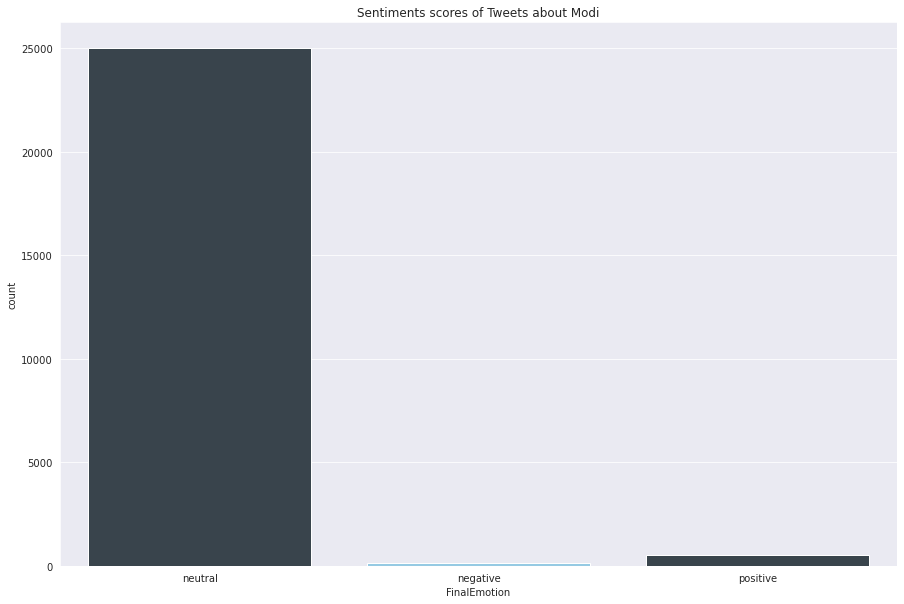

In [14]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

## <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;overflow:hidden;font-weight:500">Tweets related to Rahul Gandhi</p>

In [15]:
"""
 Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
    """;
rahul_df['pos'] = rahul_df['Tweet'].apply(lambda x :pos(x))
rahul_df['neg'] = rahul_df['Tweet'].apply(lambda x :neg(x))
rahul_df['neu'] = rahul_df['Tweet'].apply(lambda x :neu(x))

In [16]:
rahul_df

,Date,User,Tweet,pos,neg,neu
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828
...,...,...,...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906


In [17]:
emotion=[]
for i in range(0,14148):
    emotion.append(max(rahul_df['pos'][i],rahul_df['neu'][i],rahul_df['neg'][i]))

rahul_df['FinalEmotion']=emotion

"""
 Traversing through the polarity scores for each tweet and
 assigning the Final Emotion as per the highest score among positive, negative, neutral
    """;
for i in range(0,14148):
    if rahul_df['FinalEmotion'][i]==rahul_df['pos'][i]:
        rahul_df['FinalEmotion'][i]='positive'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neg'][i]:
        rahul_df['FinalEmotion'][i]='negative'
    elif rahul_df['FinalEmotion'][i]==rahul_df['neu'][i]:
        rahul_df['FinalEmotion'][i]='neutral'
rahul_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,neutral
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848,neutral
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,neutral
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,neutral
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828,neutral
...,...,...,...,...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806,neutral
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,neutral
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,neutral


### Total different emotion count

In [18]:
rahul_df['FinalEmotion'].value_counts()

neutral     13817
positive      225
negative      106
Name: FinalEmotion, dtype: int64

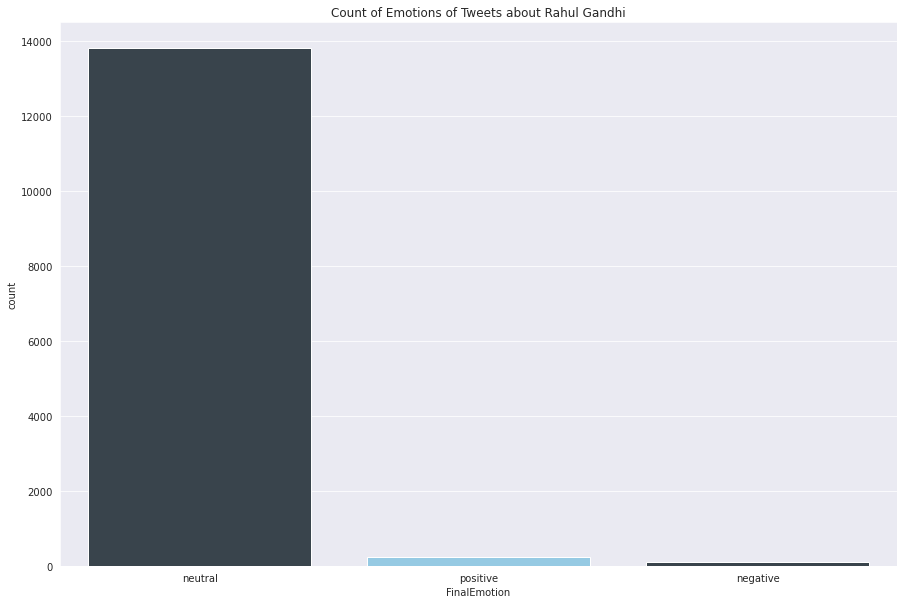

In [19]:
# Plot visualizing the counts of emotions of all the tweets
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Count of Emotions of Tweets about Rahul Gandhi')
plt.show()

<a id="h4"></a>
# <p style="padding:10px;border :black solid;background-color:lightblue;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Flair Sentiment Analysis</p>

In [ ]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

In [21]:
"""
 Flair text classifier model code snippet to get the emotion of tweet
    """;
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [22]:
#Just to clear the previous sentiments by vaderSentiment, we need to drop that columns for using Flair on it
rahul_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)
modi_df.drop(['pos', 'neg', 'neu', 'FinalEmotion'],axis=1,inplace=True)

In [23]:
rahul_df

,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...
...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...


In [24]:
# Applying flair on both the dataframes
rahul_df['Emotion']=rahul_df['Tweet'].apply(flair_prediction)
modi_df['Emotion']=modi_df['Tweet'].apply(flair_prediction)

Text(0.5, 1.0, 'Sentiments scores of Tweets about Modi')

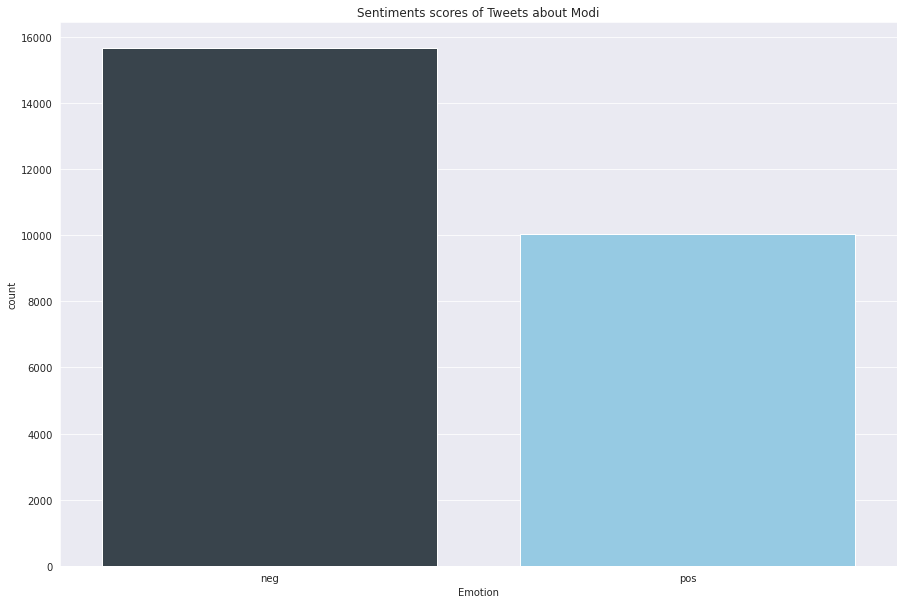

In [25]:
# Sentiments for Narendra Modi
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['Emotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')

Text(0.5, 1.0, 'Sentiments scores of Tweets about Rahul Gandhi')

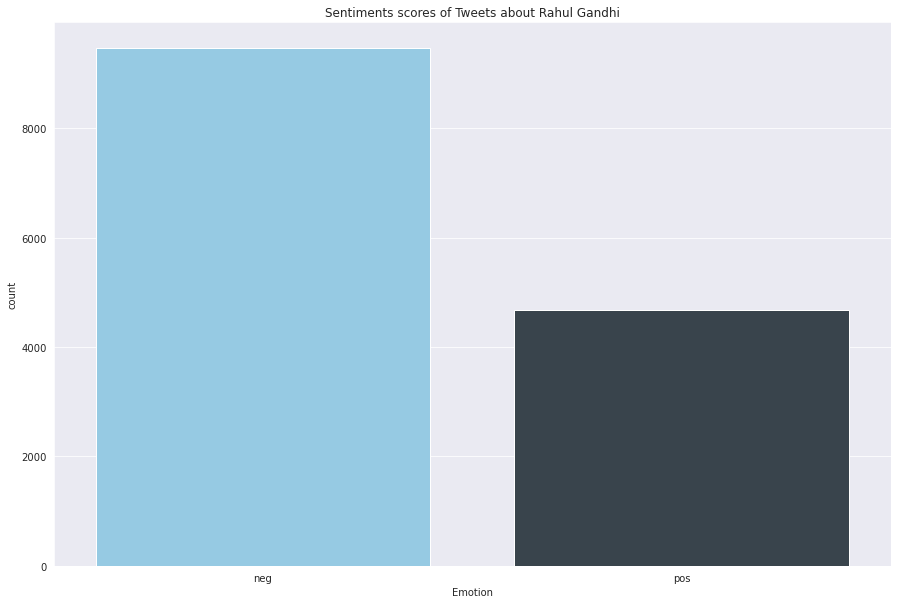

In [26]:
# Sentiments for Rahul Gandhi
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['Emotion'],palette=['#89CFF0','#36454F'])
ax.set_title('Sentiments scores of Tweets about Rahul Gandhi')

<a id="h5"></a>
# <p style="padding:10px;border :black solid;background-color:lightblue;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Tweets Polarity visualization as timeseries</p>

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:lightgreen;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"></span>
    Lets do the timeseries analysis<br>
    As we are given a timestamp of the tweets, lets see the polarity change of tweets with time

In [27]:
# Let's load the original dataset
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [28]:
# Keywords mentioning Modi and Rahul respectively
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

In [29]:
# method to refer whether contains perticular words in tweets 
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

"""
 finding whether the tweet referred about Modi or Rahul
    """;
df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref))
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df.head(10)

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,1,0
6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,0,0
7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,1,0
8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,0,0
9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,1,0


In [30]:
"""
 Filtering tweets mentioning either one of the pm candidate or both
 assigning 1 for NaModi and RaGandhi variables where there is a mention of them in the tweets 
 which was already decide by looking the keywords in tweets
    """;
df=df[(df['NaModi']==1) | (df['RaGandhi']==1)]

In [31]:
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
142555,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
142556,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
142560,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


### <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Preprocessing</p>

In [32]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Date,User,Tweet,NaModi,RaGandhi
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...
78054,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
import nltk

# Downloading imp libraries and packages
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
!python -m textblob.download_corpora

In [34]:
"""
 Processing tweets by removing stopwords from nltk library
    """;
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

,Date,User,Tweet,NaModi,RaGandhi,Processed Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,@anjanaomkashyap I seeing future #bjp spokespe...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,#LokSabhaElections2019 23rd May 2019 reveal .....
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,#LokSabhaElections2019 23rd May 2019 reveal .....
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,PM Modi creates new record PM democratic count...


In [35]:
print('Base Tweet\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned Tweet\n', df['Processed Tweet'][0])

Base Tweet
 @anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege

------------------------------------

Cleaned Tweet
 @anjanaomkashyap I seeing future #bjp spokesperson.. Good luck. Anjana Om Modi oops Kashyap. Journalists like changed meaning journalism. Janta maaf nai karege


### <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;text-align:center;overflow:hidden;font-weight:500">Sentiment Calculation Using TextBlob</p>


In [36]:
# Calculate polarity and subjectivity of the tweet
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'NaModi', 'RaGandhi', 'polarity', 'subjectivity']].head()

,Processed Tweet,NaModi,RaGandhi,polarity,subjectivity
0,@anjanaomkashyap I seeing future #bjp spokespe...,1,0,0.350000,0.362500
1,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,-0.050000,0.083333
2,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
3,#LokSabhaElections2019 23rd May 2019 reveal .....,1,0,0.800000,0.400000
4,PM Modi creates new record PM democratic count...,1,0,0.468182,0.677273


In [37]:
display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
              mean amax amin median         mean amax amin median
RaGandhi                                                         
1         0.068478  1.0 -1.0    0.0     0.346086  1.0  0.0   0.35

polarity                  subjectivity                    
            mean amax amin median         mean amax amin    median
NaModi                                                            
1       0.100709  1.0 -1.0    0.0     0.359328  1.0  0.0  0.366667

### <p style="padding:10px;border :black solid;background-color:yellow;margin:0;color:blue;font-family:newtimeroman;font-size:150%;border-radius: 25px 50px;text-align:center;overflow:hidden;font-weight:500">Visualisation</p>

In [38]:
naModi = df[df['NaModi']==1][['Date', 'polarity']]
naModi = naModi.sort_values(by='Date', ascending=True)
naModi['MA Polarity'] = naModi.polarity.rolling(10, min_periods=3).mean()

raGandhi = df[df['RaGandhi']==1][['Date', 'polarity']]
raGandhi = raGandhi.sort_values(by='Date', ascending=True)
raGandhi['MA Polarity'] = raGandhi.polarity.rolling(10, min_periods=3).mean()

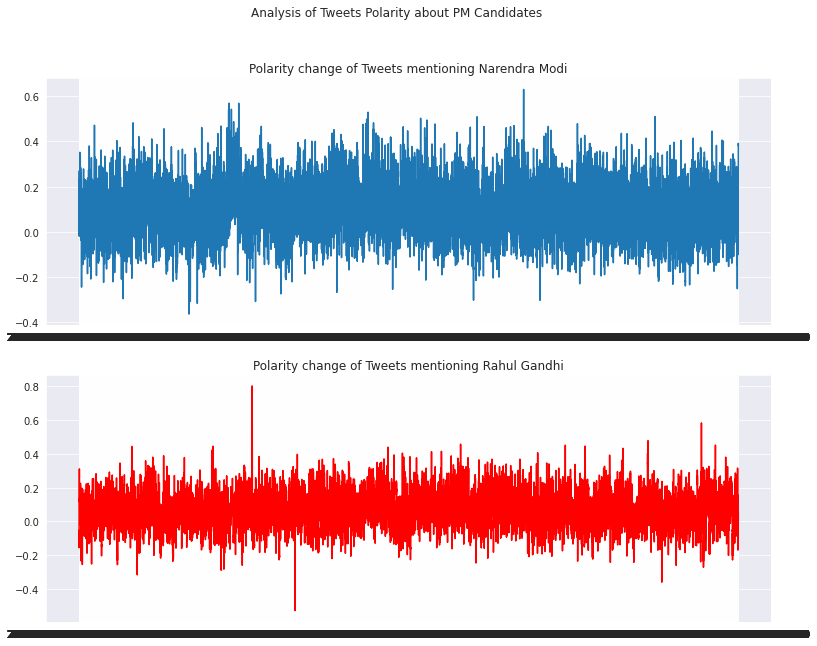

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(naModi['Date'], naModi['MA Polarity'])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'], raGandhi['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))

fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)

plt.show()

### For Better understanding lets take a smaller portion of tweets and visualize the same

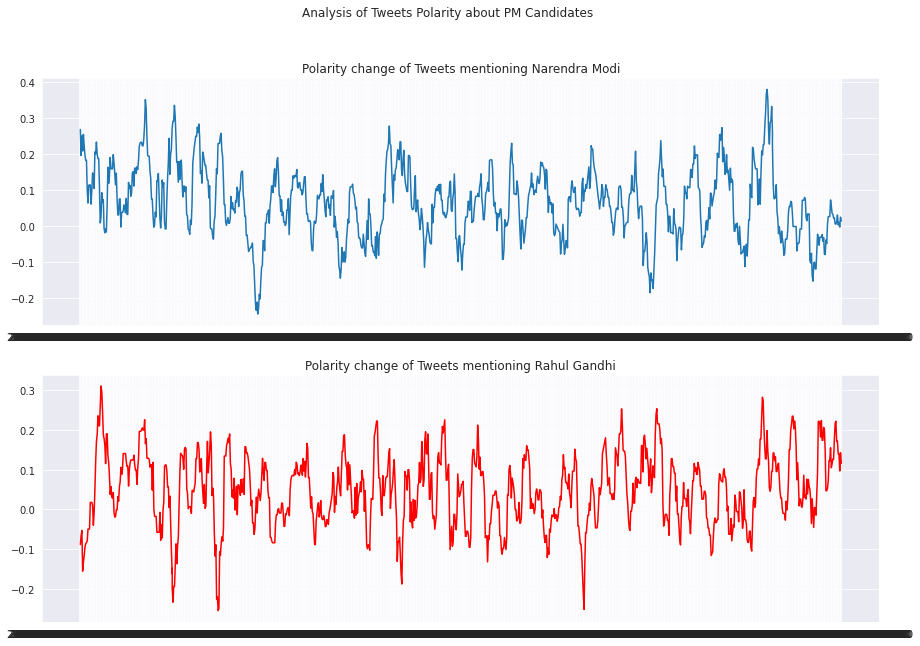

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(naModi['Date'][:1000], naModi['MA Polarity'][:1000])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'][:1000], raGandhi['MA Polarity'][:1000], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))
fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)
plt.show()

<a id="h6"></a>
# <p style="padding:10px;border :black solid;background-color:lightblue;margin:0;color:blue;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 25px 50px;overflow:hidden;font-weight:500">Result</p>

<center>
<img src="https://gumlet.assettype.com/bloombergquint%2F2018-05%2F960b802b-0ded-4fe0-b9e9-bf73ba3a0bc0%2FRAGA___MODI___SOURCE_PTI__MERGED_BY_ASIAN_AGE.jpeg?rect=0%2C0%2C796%2C448&auto=format%2Ccompress&fmt=webp&w=1200" />
</center>

## From the insights we got from this analysis and some other results from the following notebooks
* sentiment-analysis-on-PM-candidate's-tweets-using-Python
* sentiment-analysis-on-PM-candidate's-tweets-using-R

### The Sentiment Scores percentage comparison :

In [10]:
from IPython.display import Image
Image('/Results/result_tsa.png')

FileNotFoundError: No such file or directory: '/Results/result_tsa.png'

FileNotFoundError: No such file or directory: '/Results/result_tsa.png'

<IPython.core.display.Image object>

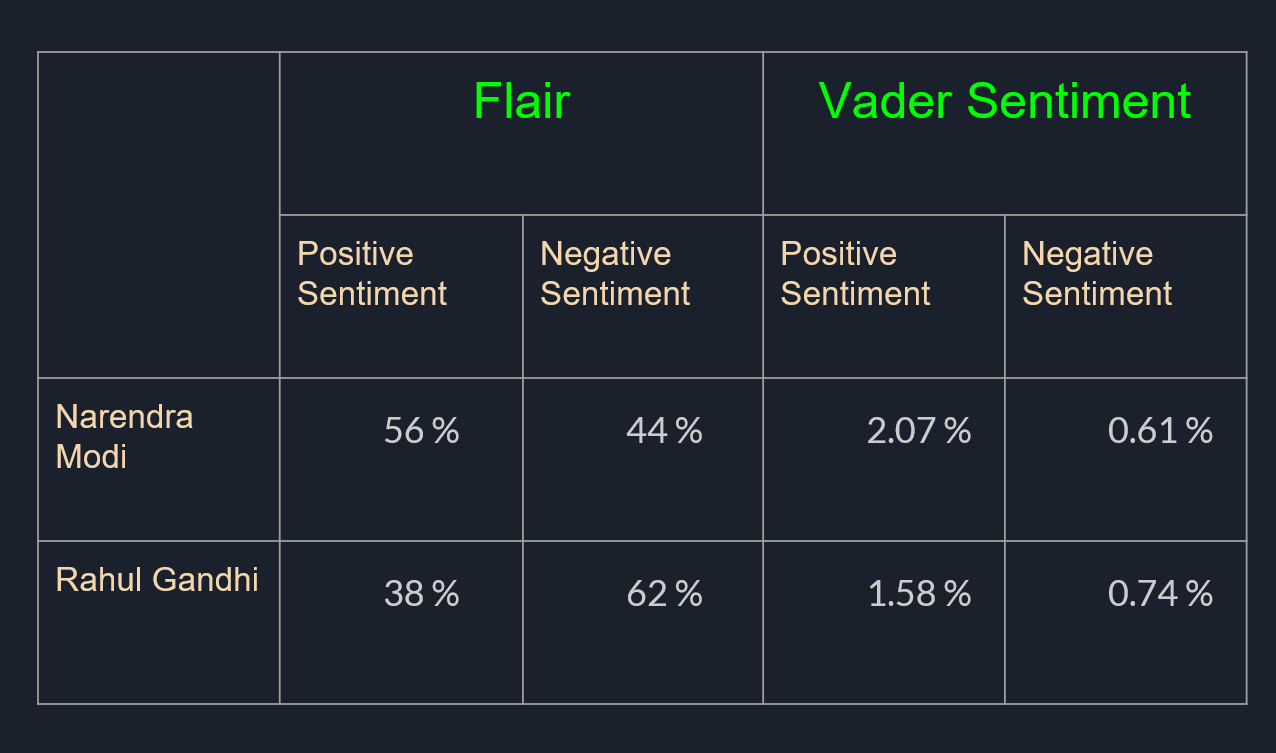

In [41]:
from IPython.display import Image
Image("Results/result_tsa.png")

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:#E9F6E2;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"></span>


 📌 Both candidate have RELATIVELY same no. of tweets so we can assume somewhat same engagement from both sides.

 📌 Though if we see the negative polarity score is more for Rahul Gandhi's tweets than Narendra Modi's tweets, It may be beneficial for both the sides as RG is the leader of opposition and NaMo was present PM, But POSITIVE APPROACH OF MODI'S TWEETS MAY BE SLIGHTLY MORE THAN RAHUL GANDHI'S NEGATIVE TWEETS.
  
 📌 If we see by using Vader Sentiments on raw data, we see that positive tweets percentage for Narendra Modi is more than Rahul Gandhi (though slightly)
 
 📌 No. of tweets mentioning about Rahul Gandhi (14148) is very less than Narendra Modi(25683)
    
 
 📌 If we see analysis with get_nrc_sentiment (R library) we see there is sudden difference between Disgust and joy curve in Narendra Modi but it almost same in case of Rahul Gandhi
    
    
    


<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:lightgreen;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"></span>
    So if we consider only on the twitter data we can say that Narendra Modi is ahead of Rahul Gandhi in terms of twitter popularity, overall polarity and audience engagement. <br>
    So all the way it goes into favor of Narendra Modi.<br>    
    <strong>Hence chances of Narendra Modi to win the election was more than Rahul Gandhi.</strong>

---
<span style="font-family:Comic Sans MS; color:golden; font-size:200%;"><strong>Hope you like it</strong></span><br>
<blockquote><h2><span style="color:navy">T</span><span style="color:blue">h</span><span style="color:green">a</span><span style="color:red">n</span><span style="color:red">k</span> <span style="color:green">y</span><span style="color:blue">o</span><span style="color:navy">u</span> 🙂</h2></blockquote>